In [1]:
import pandas as pd

# Load the dataset
file_path = "C:/Users/amit_/Downloads/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition/ObesityDataSet_raw_and_data_sinthetic.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [2]:
# Basic information and summary statistics
data_info = data.info()
summary_stats = data.describe(include='all')

# Check for missing values
missing_values = data.isnull().sum()

# Data distribution visualization
# Visualize the distribution of numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

data_info, summary_stats, missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

(None,
        Gender          Age       Height       Weight  \
 count    2111  2111.000000  2111.000000  2111.000000   
 unique      2          NaN          NaN          NaN   
 top      Male          NaN          NaN          NaN   
 freq     1068          NaN          NaN          NaN   
 mean      NaN    24.312600     1.701677    86.586058   
 std       NaN     6.345968     0.093305    26.191172   
 min       NaN    14.000000     1.450000    39.000000   
 25%       NaN    19.947192     1.630000    65.473343   
 50%       NaN    22.777890     1.700499    83.000000   
 75%       NaN    26.000000     1.768464   107.430682   
 max       NaN    61.000000     1.980000   173.000000   
 
        family_history_with_overweight  FAVC         FCVC          NCP  \
 count                            2111  2111  2111.000000  2111.000000   
 unique                              2     2          NaN          NaN   
 top                               yes   yes          NaN          NaN   
 freq      

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error

# Encoding categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Separating features and target variable
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizing the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initializing and training the decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Making predictions
y_pred = decision_tree.predict(X_test)

# Calculating performance metrics
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Train the decision tree with the best parameters
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)

# Evaluate on the test set
best_y_pred = best_dt.predict(X_test)
best_test_accuracy = accuracy_score(y_test, best_y_pred)

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_accuracy}")
print(f"Test Set Accuracy: {best_test_accuracy}")
print(mse)
print(mae)


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Cross-Validation Accuracy: 0.9444800732936326
Test Set Accuracy: 0.9369085173501577
0.6466876971608833
0.19873817034700317


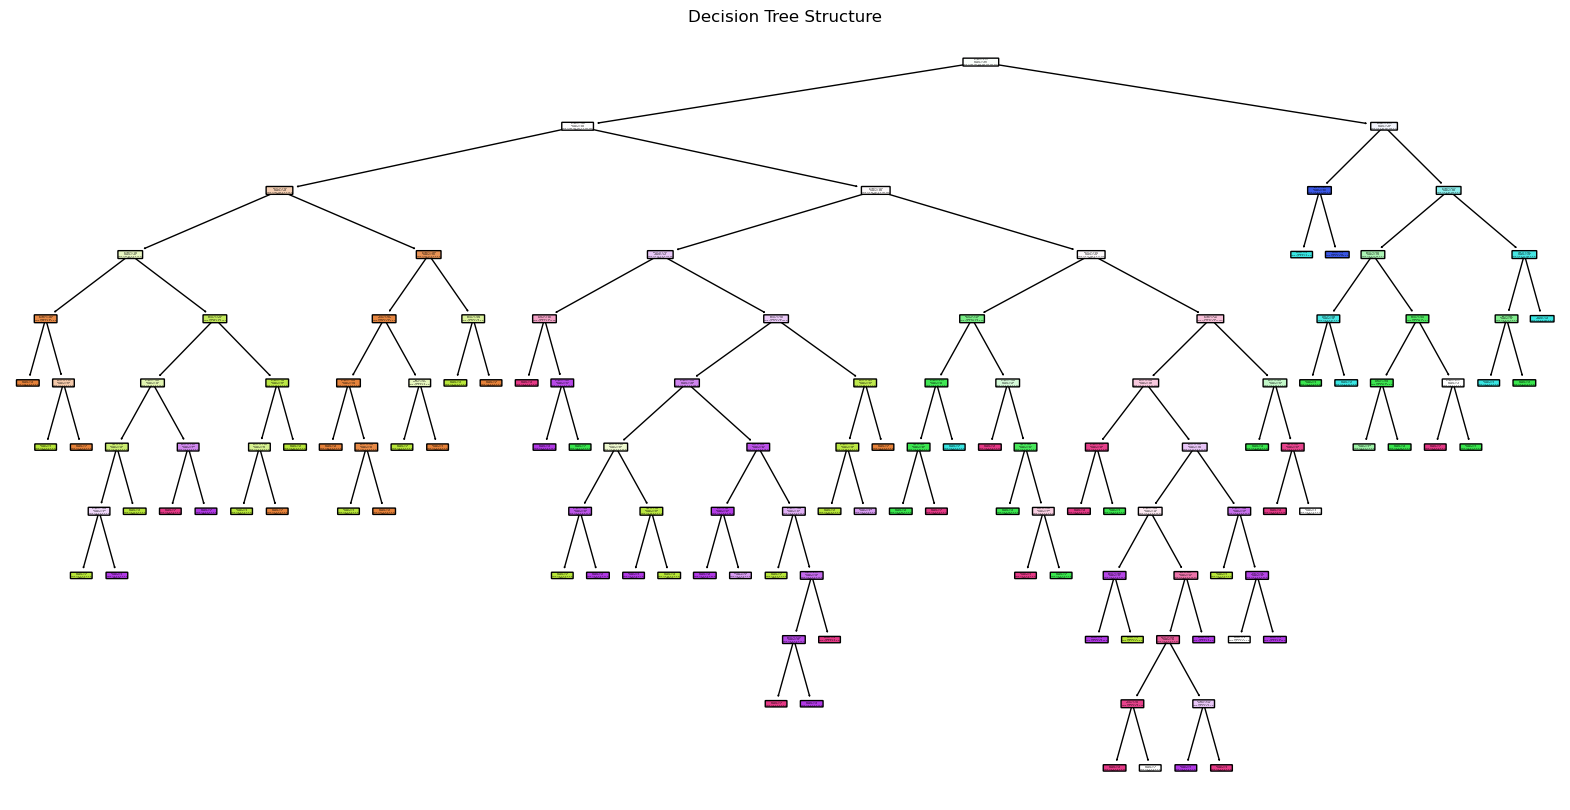

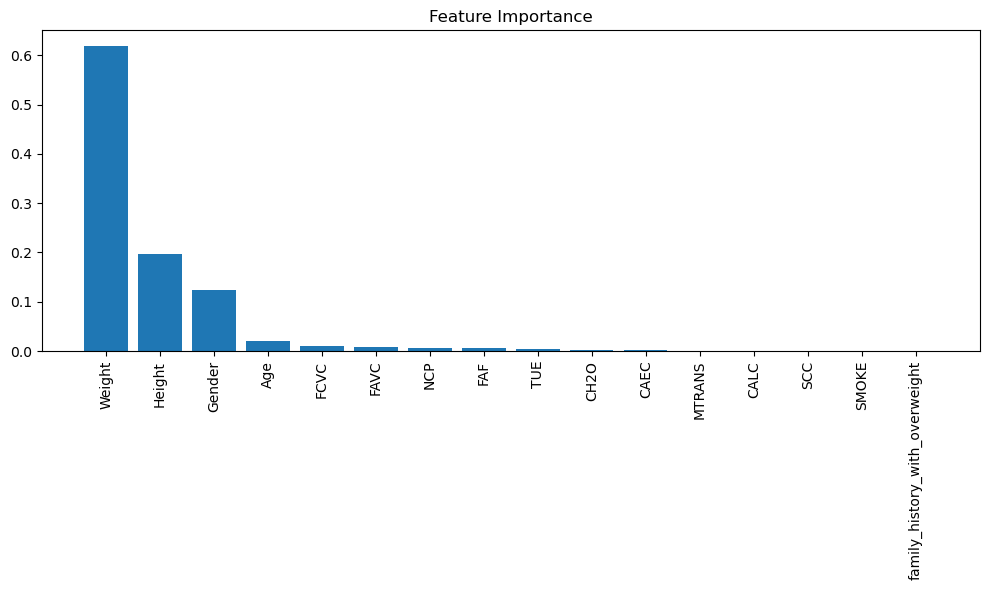

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np

# Convert the class names to strings
class_names = label_encoders.get('NObeyesdad', None)
if class_names is None:
    # Directly retrieve class names from the target variable if the encoder is not stored
    class_names = list(map(str, np.unique(y)))
else:
    class_names = list(map(str, class_names.classes_))

# Convert feature names to a list
feature_names = list(X.columns)

# Plot the tree structure
plt.figure(figsize=(20, 10))
plot_tree(best_dt, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
plt.title("Decision Tree Structure")
plt.show()

# Feature importance plot
importances = best_dt.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()
